In [1]:
import random

def mutate_rule(rule, min_signature=1, max_signature=4,max_value=4):
    """
    Mutate a single rule within the given signature range, ensuring a change always occurs.
    
    :param rule: A tuple representing a rule (e.g., (1, 2, 3))
    :param min_signature: Minimum signature (default: 1)
    :param max_signature: Maximum signature (default: 4)
    :return: A new, mutated rule
    """
    mutated_rule = rule.copy()

    

    

    while True:  # Keep trying until we make a change

        
        # Randomly choose a mutation operation
        mutation_type = random.choice(["change", "add", "remove"])

        
        if mutation_type == "change":
            # Change a single element
            index = random.randint(0, len(mutated_rule) - 1)
            new_value = random.randint(1, max_value+1)
            
            if new_value != mutated_rule[index]:
                max_value=max(max_value,new_value)
                mutated_rule[index] = new_value
                break
        
        elif mutation_type == "add" and len(mutated_rule) < max_signature:
            mutated_rule.append(random.randint(1, max_value+1))
            break
        
        elif mutation_type == "remove" and len(mutated_rule) > min_signature:
            # Remove a random element
            index = random.randint(0, len(mutated_rule) - 1)
            mutated_rule.pop(index)
            break
    
    return mutated_rule


def reduce_max(ruleset):
    # number are just tags, so use lower number
    # find number of distinct numbers
    numbers=set()
    for key in ["in", "out"]:
        for rule in ruleset[key]:
            for number in rule:
                numbers.add(number)
    numbers=list(numbers)
    correspondence={
        number: i+1 for i,number in enumerate(numbers)
    }
    # change the rules
    for key in ["in", "out"]:
        for rule in ruleset[key]:
            for i in range(len(rule)):
                rule[i]=correspondence[rule[i]]
    return ruleset

def mutate_ruleset(ruleset, min_signature=1, max_signature=4):
    """
    Mutate a ruleset, ensuring at least one rule is always changed.
    
    :param ruleset: A dictionary with 'in' and 'out' lists of rules
    :param min_signature: Minimum signature (default: 1)
    :param max_signature: Maximum signature (default: 4)
    :return: A new, mutated ruleset
    """
    mutated_ruleset = {
        "in": [],
        "out": []
    }
    
    changed = False

    max_value=max(max(max(ruleset["in"]),max(ruleset["out"])))

    for key in ["in", "out"]:
        for rule in ruleset[key]:
            
            if not changed or random.random() < 0.5:  # Ensure at least one change, then 50% chance for others
                mutated_rule = mutate_rule(rule, min_signature, max_signature,  max_value)
                mutated_ruleset[key].append(mutated_rule)
                if mutated_rule != rule:
                    changed = True
            else:
                mutated_ruleset[key].append(rule)
    
    # If no changes were made (very unlikely), force a change on a random rule
    if not changed:
        key = random.choice(["in", "out"])
        index = random.randint(0, len(mutated_ruleset[key]) - 1)
        mutated_ruleset[key][index] = mutate_rule(mutated_ruleset[key][index], min_signature, max_signature,  max_value)
    
    return reduce_max(mutated_ruleset)

# reduce the max number in mutated_ruleset




# Example usage
original_rules = {
    "in": [[1, 1, 2], [3,  1]],
    "out": [[1, 1], [2, 3], [2, 1]]
}

# Demonstrate that changes always occur
for i in range(100):
    mutated_rules = mutate_ruleset(original_rules)
    print(f"\nIteration {i+1}:")
    print(mutated_rules)


Iteration 1:
{'in': [[1, 1, 4], [3, 1, 1]], 'out': [[1, 1, 3], [2, 3, 1], [3, 1]]}

Iteration 2:
{'in': [[1, 2], [3, 1]], 'out': [[1, 1], [2, 3], [2, 1]]}

Iteration 3:
{'in': [[1, 1, 2, 3], [3, 2]], 'out': [[2, 1], [2, 3], [2, 4]]}

Iteration 4:
{'in': [[1, 3, 2], [3, 1]], 'out': [[1, 1], [2, 3], [4, 1]]}

Iteration 5:
{'in': [[1, 2], [3, 1]], 'out': [[1, 1], [2, 3], [2, 1, 3]]}

Iteration 6:
{'in': [[1, 2], [3, 1, 3]], 'out': [[1, 1], [2], [2, 1, 4]]}

Iteration 7:
{'in': [[1, 2], [1]], 'out': [[1, 1], [2, 3], [2]]}

Iteration 8:
{'in': [[1, 2, 2], [4, 1]], 'out': [[1, 1], [2, 3], [1]]}

Iteration 9:
{'in': [[1, 1, 2, 2], [1]], 'out': [[1, 1], [3], [2, 1]]}

Iteration 10:
{'in': [[1, 1, 2, 4], [3, 1]], 'out': [[1, 1, 3], [2, 3, 1], [2, 1]]}

Iteration 11:
{'in': [[1, 2, 2], [3, 1, 2]], 'out': [[1, 3], [2, 3], [2, 1]]}

Iteration 12:
{'in': [[1, 1], [3, 1]], 'out': [[1, 1], [2], [2, 1, 2]]}

Iteration 13:
{'in': [[1, 2], [3, 1, 3]], 'out': [[1, 1, 1], [2, 3], [2, 1, 1]]}

Iteration 1

In [2]:
def patter2string(pattern):
    return str(pattern).replace("[", "{").replace("]", "}").replace("(", "{").replace(")", "}")

def rules2string(rules):
    # write rule to this format {{{1, 1, 2}, {3, 2, 4}} -> {{2, 2, 4}, {5, 3, 2}, {3, 1, 3}}}
    rules_str = str(rules["in"]) + " -> " + str(rules["out"])
    rules_str = patter2string(rules_str)
    return rules_str


print(rules2string(original_rules))

def initial_contition(rules):
    in_rules=rules["in"]
    #fill with 0
    initial_condition=[]
    for i in range(len(in_rules)):
        initial_condition.append([1]*len(in_rules[i]))

    return initial_condition

print(initial_contition(original_rules))


{{1, 1, 2}, {3, 1}} -> {{1, 1}, {2, 3}, {2, 1}}
[[1, 1, 1], [1, 1]]


In [3]:
original_rules

{'in': [[1, 1, 2], [3, 1]], 'out': [[1, 1], [2, 3], [2, 1]]}

In [4]:
from wolframclient.evaluation import WolframLanguageSession

from wolframclient.language import wl, wlexpr

session = WolframLanguageSession(
    '/usr/local/Wolfram/Wolfram/14.1/Executables/WolframKernel'
)



In [5]:
# compute 2+2
result = session.evaluate(wl.Plus(3, 32))
print(result)

35


In [6]:
# {{{1, 1, 2}, {3, 2, 4}} -> {{2, 2, 4}, {5, 3, 2}, {3, 1, 3}}}
# result = session.evaluate(wlexpr('ResourceFunction["WolframModel"][{{x, y}, {x, z}} -> {{x, z}, {x, w}, {y, w}, {z, w}},{{0,0},{0,0}}, 1,"FinalState"]'))
# result
# instead compute state after state

# {{{1, 1, 2}, {3, 4, 1}} -> {{1, 1, 4}, {5, 4, 3}, {2, 5, 1}}}
current_rules = {
    "in": [[1, 1, 2], [3,  4, 1]],
    "out": [[1, 1, 4], [5, 4, 3], [2, 5, 1]]
}

import time

def runWolframModel(rules):
    current_state=initial_contition(rules)
    rules_str=rules2string(rules)

    for i in range(200):
        past_time=time.time()


        expr="ResourceFunction[\"WolframModel\"][{"+rules_str+"},"+   patter2string(current_state)  +", 1,\"FinalState\"]"
   #     print("expr",expr)

        result = session.evaluate(wlexpr(expr))

        # convert as a list of list
    #    print("result",result)
        result=[list(x) for x in result]

        # check if the result is the same as the initial state
        if result==current_state:
            break
        if i>0 and time.time()-past_time>1:
            break
        if len(result)>200:
            break

    #    print("result",result)

        current_state=result

    return 1+i,result


In [7]:
for _ in range(1):
    print(runWolframModel(current_rules))
    current_rules = mutate_ruleset(current_rules)
    print("current_rules",current_rules)

(199, [[3, 1, 2], [6, 2, 4], [8, 3, 5], [9, 5, 2], [10, 6, 3], [11, 4, 7], [12, 7, 2], [13, 8, 4], [14, 9, 3], [15, 10, 5], [16, 11, 6], [17, 12, 4], [18, 13, 7], [19, 14, 8], [20, 15, 9], [21, 16, 10], [22, 17, 11], [23, 18, 12], [24, 19, 13], [25, 20, 14], [26, 21, 15], [27, 22, 16], [28, 23, 17], [29, 24, 18], [30, 25, 19], [31, 26, 20], [32, 27, 21], [33, 28, 22], [34, 29, 23], [35, 30, 24], [36, 31, 25], [37, 32, 26], [38, 33, 27], [39, 34, 28], [40, 35, 29], [41, 36, 30], [42, 37, 31], [43, 38, 32], [44, 39, 33], [45, 40, 34], [46, 41, 35], [47, 42, 36], [48, 43, 37], [49, 44, 38], [50, 45, 39], [51, 46, 40], [52, 47, 41], [53, 48, 42], [54, 49, 43], [55, 50, 44], [56, 51, 45], [57, 52, 46], [58, 53, 47], [59, 54, 48], [60, 55, 49], [61, 56, 50], [62, 57, 51], [63, 58, 52], [64, 59, 53], [65, 60, 54], [66, 61, 55], [67, 62, 56], [68, 63, 57], [69, 64, 58], [70, 65, 59], [71, 66, 60], [72, 67, 61], [73, 68, 62], [74, 69, 63], [75, 70, 64], [76, 71, 65], [77, 72, 66], [78, 73, 67],

In [8]:
edges=current_state
# compute relevant graph statistics
import networkx as nx

def graph_statistics(nb_steps,edges):
    G = nx.MultiDiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])
        
    # compute relevant graph statistics

    print("Steps:", nb_steps/200)
    flight=nb_steps/200
    nodes_edges=1/(1+G.number_of_nodes()/G.number_of_edges())
    avg_degree=sum(d for n, d in G.degree()) / G.number_of_nodes()
    density=nx.density(G)
    degree_centrality= max(nx.degree_centrality(G).values())

    return [flight,nodes_edges,avg_degree,density,degree_centrality]




NameError: name 'current_state' is not defined

In [10]:
edges=[[3, 1, 2], [6, 2, 4], [8, 3, 5], [9, 5, 2], [10, 6, 3], [11, 4, 7], [12, 7, 2], [13, 8, 4], [14, 9, 3], [15, 10, 5], [16, 11, 6], [17, 12, 4], [18, 13, 7], [19, 14, 8], [20, 15, 9], [21, 16, 10], [22, 17, 11], [23, 18, 12], [24, 19, 13], [25, 20, 14], [26, 21, 15], [27, 22, 16], [28, 23, 17], [29, 24, 18], [30, 25, 19], [31, 26, 20], [32, 27, 21], [33, 28, 22], [34, 29, 23], [35, 30, 24], [36, 31, 25], [37, 32, 26], [38, 33, 27], [39, 34, 28], [40, 35, 29], [41, 36, 30], [42, 37, 31], [43, 38, 32], [44, 39, 33], [45, 40, 34], [46, 41, 35], [47, 42, 36], [48, 43, 37], [49, 44, 38], [50, 45, 39], [51, 46, 40], [52, 47, 41], [53, 48, 42], [54, 49, 43], [55, 50, 44], [56, 51, 45], [57, 52, 46], [58, 53, 47], [59, 54, 48], [60, 55, 49], [61, 56, 50], [62, 57, 51], [63, 58, 52], [64, 59, 53], [65, 60, 54], [66, 61, 55], [67, 62, 56], [68, 63, 57], [69, 64, 58], [70, 65, 59], [71, 66, 60], [72, 67, 61], [73, 68, 62], [74, 69, 63], [75, 70, 64], [76, 71, 65], [77, 72, 66], [78, 73, 67], [79, 74, 68], [80, 75, 69], [81, 76, 70], [82, 77, 71], [83, 78, 72], [84, 79, 73], [85, 80, 74], [86, 81, 75], [87, 82, 76], [88, 83, 77], [89, 84, 78], [90, 85, 79], [91, 86, 80], [92, 87, 81], [93, 88, 82], [94, 89, 83], [95, 90, 84], [96, 91, 85], [97, 92, 86], [98, 93, 87], [99, 94, 88], [100, 95, 89], [101, 96, 90], [102, 97, 91], [103, 98, 92], [104, 99, 93], [105, 100, 94], [106, 101, 95], [107, 102, 96], [108, 103, 97], [109, 104, 98], [110, 105, 99], [111, 106, 100], [112, 107, 101], [113, 108, 102], [114, 109, 103], [115, 110, 104], [116, 111, 105], [117, 112, 106], [118, 113, 107], [119, 114, 108], [120, 115, 109], [121, 116, 110], [122, 117, 111], [123, 118, 112], [124, 119, 113], [125, 120, 114], [126, 121, 115], [127, 122, 116], [128, 123, 117], [129, 124, 118], [130, 125, 119], [131, 126, 120], [132, 127, 121], [133, 128, 122], [134, 129, 123], [135, 130, 124], [136, 131, 125], [137, 132, 126], [138, 133, 127], [139, 134, 128], [140, 135, 129], [141, 136, 130], [142, 137, 131], [143, 138, 132], [144, 139, 133], [145, 140, 134], [146, 141, 135], [147, 142, 136], [148, 143, 137], [149, 144, 138], [150, 145, 139], [151, 146, 140], [152, 147, 141], [153, 148, 142], [154, 149, 143], [155, 150, 144], [156, 151, 145], [157, 152, 146], [158, 153, 147], [159, 154, 148], [160, 155, 149], [161, 156, 150], [162, 157, 151], [163, 158, 152], [164, 159, 153], [165, 160, 154], [166, 161, 155], [167, 162, 156], [168, 163, 157], [169, 164, 158], [170, 165, 159], [171, 166, 160], [172, 167, 161], [173, 168, 162], [174, 169, 163], [175, 170, 164], [176, 171, 165], [177, 172, 166], [178, 173, 167], [179, 174, 168], [180, 175, 169], [181, 176, 170], [182, 177, 171], [183, 178, 172], [184, 179, 173], [185, 180, 174], [186, 181, 175], [187, 182, 176], [188, 183, 177], [189, 184, 178], [190, 185, 179], [191, 186, 180], [192, 187, 181], [193, 188, 182], [194, 189, 183], [195, 190, 184], [196, 191, 185], [190, 196, 1], [197, 192, 186], [191, 197, 1], [198, 193, 187], [192, 198, 1], [199, 194, 188], [193, 199, 1], [1, 1, 195], [200, 195, 189], [194, 200, 1]]

In [24]:
import networkx as nx
G = nx.MultiDiGraph()
for edge in edges[:10]:
    G.add_edge(edge[0], edge[1])

<Figure size 800x800 with 0 Axes>

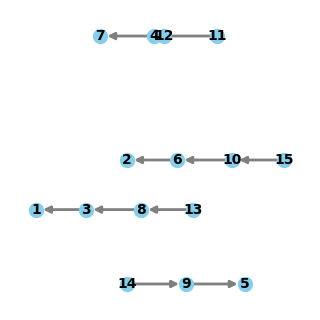

In [38]:
# plot graph with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
from networkx.drawing.nx_agraph import graphviz_layout
# sfdp is used for large graphs


pos = graphviz_layout(G, prog="sfdp")


plt.figure(figsize=(3, 3))

# draw graph in the center of the fig, with large margins



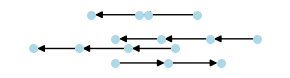

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Assume G is your networkx graph object
# If you don't have a graph, you can create a sample one:
# G = nx.erdos_renyi_graph(20, 0.2)

plt.figure(figsize=(3, 3))

# Create a subplot
ax = plt.subplot(111)

# Use graphviz_layout with sfdp for large graphs
pos = graphviz_layout(G, prog="sfdp")

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=30, node_color='lightblue', 
        with_labels=False, arrows=True)

# Set the subplot to be square
ax.set_aspect('equal')

# Adjust the subplot to take up a subquare of the figure
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

plt.axis('off')
plt.tight_layout()
plt.show()

/tmp/ipykernel_17108/920283744.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


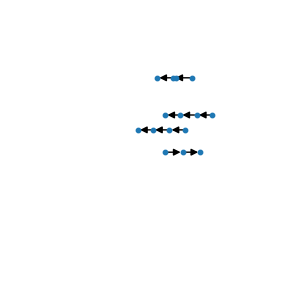

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Assume G is your NetworkX graph object
# If you don't have a graph, you can create a sample one:
# G = nx.random_geometric_graph(20, 0.2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(3, 3))

# Remove axis
ax.set_axis_off()

# Create a smaller axes object
# The dimensions are in figure coordinates (0 to 1)
# Here we're creating a square that's 10% of the figure size with equal margins
graph_ax = fig.add_axes([0.45, 0.45, 0.3, 0.3])

# Generate layout
pos = graphviz_layout(G, prog="sfdp")

# Draw the graph
nx.draw(G, pos, ax=graph_ax, node_size=10, with_labels=False)

# Remove axis from the graph subplot
graph_ax.set_axis_off()

# Adjust the layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()